In [ ]:
import pickle
import numpy as np

In [ ]:
with open('./Y_arr_train.pkl', 'rb') as file:
    Y = pickle.load(file)

In [ ]:
with open('./X_arr_train.pkl', 'rb') as file:
    X = pickle.load(file)

In [ ]:
inf_X = np.argwhere(np.isinf(X))
inf_Y = np.argwhere(np.isinf(Y))
if inf_X.size > 0:
    print("Inf in X founded at index:", inf_X)
if inf_Y.size > 0:
    print("Inf in Y founded at index:", inf_Y)

In [ ]:
nan_X = np.argwhere(np.isnan(X))
nan_Y = np.argwhere(np.isnan(Y))
if nan_X.size > 0:
    print("NaN in X founded at index:", nan_X)
if nan_Y.size > 0:
    print("NaN in Y founded at index:", nan_Y)

NaN значения в X найдены по индексам: [[79096   492]
 [79096   518]]
NaN значения в Y найдены по индексам: [[ 2237   492]
 [ 2237   518]
 [23229  1598]
 [23229  1599]
 [44004  1394]
 [44004  1398]
 [56549   246]
 [56549   278]]


In [ ]:
X[-1].reshape(40,40)

matrix = []

for i in range(1600):
  row = []
  if i % 40 != 0:
    row.append(X[-1][i])
  else:
    matrix.append(row)
    row = []
    row.append(X[-1][i])


In [ ]:
print(X[-1].reshape(40,40))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
nan_indices_X = np.argwhere(np.isnan(X))
nan_indices_Y = np.argwhere(np.isnan(Y))
inf_indices_X = np.argwhere(np.isinf(X))
inf_indices_Y = np.argwhere(np.isinf(Y))

# Объединение всех индексов для удаления
all_nan_inf_indices = np.unique(np.concatenate((nan_indices_X[:, 0], nan_indices_Y[:, 0], inf_indices_X[:, 0], inf_indices_Y[:, 0])))
all_nan_inf_indices
# Удаление соответствующих элементов из X и Y
X_clean = np.delete(X, all_nan_inf_indices, axis=0)
Y_clean = np.delete(Y, all_nan_inf_indices, axis=0)

# Проверка, что размеры массивов совпадают
assert X_clean.shape[0] == Y_clean.shape[0]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, InputLayer
from tensorflow.keras.optimizers import Adam

# Создание модели
input_shape = 1600  # 40x40 матрица

model = Sequential()
model.add(InputLayer(input_shape=input_shape))
model.add(Dense(6400, activation='relu'))
model.add(Dense(1600, activation='linear'))
# model.add(Reshape(input_shape))

# Компиляция модели с пониженной скоростью обучения и градиентным клиппингом
optimizer = Adam()
model.compile(optimizer=optimizer, loss='mse')



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix

X_clean = csr_matrix(X_clean)
Y_clean = csr_matrix(Y_clean)

X_clean_dense = X_clean.todense()
Y_clean_dense = Y_clean.todense()


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_clean_dense, Y_clean_dense, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.15, patience=2, min_lr=1e-6)
history = model.fit(X_train, Y_train, epochs=20, batch_size=256, validation_data=(X_test, Y_test), callbacks=[reduce_lr])

Epoch 1/20
286/286 [==============================] - 15s 26ms/step - loss: 8.0116e-04 - val_loss: 3.9802e-04 - lr: 0.0010
Epoch 2/20
286/286 [==============================] - 5s 16ms/step - loss: 3.6150e-04 - val_loss: 3.5078e-04 - lr: 0.0010
Epoch 3/20
286/286 [==============================] - 4s 15ms/step - loss: 3.2883e-04 - val_loss: 3.3226e-04 - lr: 0.0010
Epoch 4/20
286/286 [==============================] - 4s 16ms/step - loss: 3.0953e-04 - val_loss: 3.2058e-04 - lr: 0.0010
Epoch 5/20
286/286 [==============================] - 5s 16ms/step - loss: 2.7423e-04 - val_loss: 2.9457e-04 - lr: 2.0000e-04
Epoch 6/20
286/286 [==============================] - 4s 16ms/step - loss: 2.6841e-04 - val_loss: 2.9197e-04 - lr: 2.0000e-04
Epoch 7/20
286/286 [==============================] - 5s 16ms/step - loss: 2.6520e-04 - val_loss: 2.9033e-04 - lr: 2.0000e-04
Epoch 8/20
286/286 [==============================] - 6s 19ms/step - loss: 2.6218e-04 - val_loss: 2.8770e-04 - lr: 2.0000e-04
Epoch 9

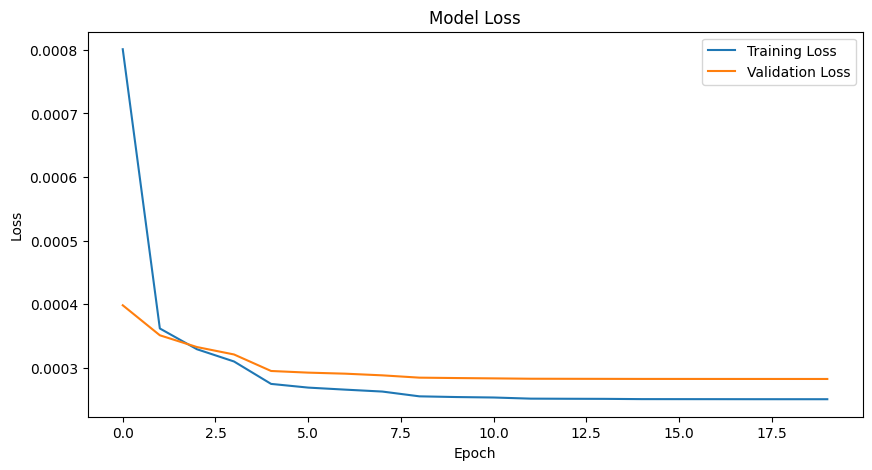

572/572 [==============================] - 2s 4ms/step - loss: 2.8199e-04
Test loss: 0.0002819852961692959


In [ ]:
import matplotlib.pyplot as plt

# Визуализация истории обучения
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Оценка модели на тестовом наборе
loss = model.evaluate(X_test, Y_test)
print("Test loss:", loss)